In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

In [29]:
# define the parameters that will be used in the data file
delX = 0.25
delY = 0.25
xgOrigin = 55
ygOrigin = -20
n_rows = 280
n_cols = 160

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX+delX/2, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY+delY/2, delY)
XC, YC = np.meshgrid(xc, yc)

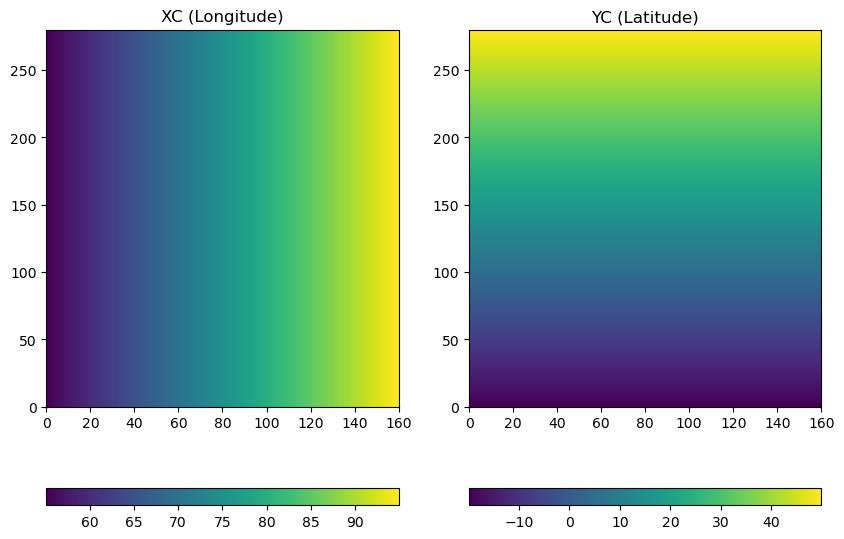

In [30]:
# make a plot of XC and YC
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
C = plt.pcolormesh(XC)
plt.colorbar(C, orientation = 'horizontal')
plt.title('XC (Longitude)')

plt.subplot(1,2,2)
C = plt.pcolormesh(YC)
plt.colorbar(C, orientation = 'horizontal')
plt.title('YC (Latitude)')

plt.show()

/opt/miniconda3/envs/cs185c/lib/python3.12/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/miniconda3/envs/cs185c/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


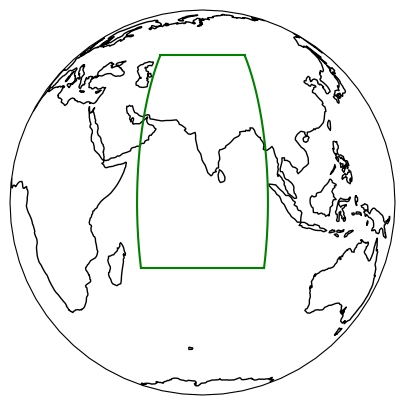

In [31]:
plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.Orthographic(75, 0))
ax.plot(XC[:,0], YC[:,0], 'g-', transform=ccrs.PlateCarree())
ax.plot(XC[:,-1], YC[:,-1], 'g-', transform=ccrs.PlateCarree())
ax.plot(XC[0,:], YC[0,:], 'g-', transform=ccrs.PlateCarree())
ax.plot(XC[-1,:], YC[-1,:], 'g-', transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
plt.show()

In [32]:
def great_circle_distance(lon_ref, lat_ref, Lon, Lat):
    earth_radius = 6371000
    lon_ref_radians = np.radians(lon_ref)
    lat_ref_radians = np.radians(lat_ref)
    lons_radians = np.radians(Lon)
    lats_radians = np.radians(Lat)
    lat_diff = lats_radians - lat_ref_radians
    lon_diff = lons_radians - lon_ref_radians
    d = np.sin(lat_diff * 0.5) ** 2 + np.cos(lat_ref_radians) * np.cos(lats_radians) * np.sin(lon_diff * 0.5) ** 2
    h = 2 * earth_radius * np.arcsin(np.sqrt(d))
    return(h)

In [33]:
dXC = np.zeros((np.shape(XC)[0], np.shape(XC)[1]-1))
for row in range(np.shape(XC)[0]):
    for col in range(np.shape(XC)[1]-1):
        dXC[row,col] = great_circle_distance(XC[row,col], YC[row,col], XC[row,col+1], YC[row,col+1])

dYC = np.zeros((np.shape(YC)[0]-1, np.shape(YC)[1]))
for row in range(np.shape(XC)[0]-1):
    for col in range(np.shape(XC)[1]):
        dYC[row,col] = great_circle_distance(XC[row,col], YC[row,col], XC[row+1,col], YC[row+1,col])

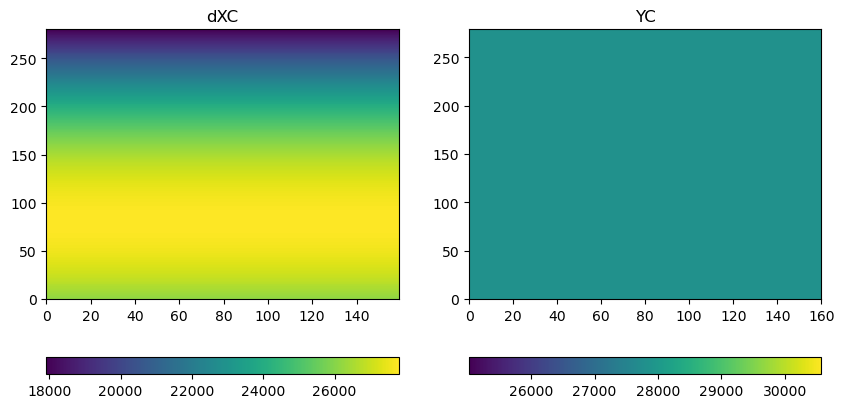

In [34]:
# make a plot of XC and YC
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
C = plt.pcolormesh(dXC)
plt.colorbar(C, orientation = 'horizontal')
plt.title('dXC')

plt.subplot(1,2,2)
C = plt.pcolormesh(dYC.round(3))
plt.colorbar(C, orientation = 'horizontal')
plt.title('YC')

plt.show()